## 1. Fundamental
Don’t get confused by its name! It is **a classification not a regression** algorithm. It is used to estimate discrete values ( Binary values like 0/1, yes/no, true/false ) based on given set of independent variable(s). In simple words, it **predicts the probability of occurrence of an event** by fitting data to a logit function. Hence, it is also known as logit regression. Since, it predicts the probability, its output values lies between 0 and 1 (as expected).

Again, let us try and understand this through a simple example.

*Let’s say your friend gives you a puzzle to solve. There are only 2 outcome scenarios – either you solve it or you don’t. Now imagine, that you are being given wide range of puzzles/quizzes in an attempt to understand which subjects you are good at. The outcome to this study would be something like this – if you are given a trignometry based tenth grade problem, you are 70% likely to solve it. On the other hand, if it is grade fifth history question, the probability of getting an answer is only 30%. This is what Logistic Regression provides you.*

Coming to the math, the log odds of the outcome is modeled as a linear combination of the predictor variables.

$$
\text{odds} = \frac{p}{1-p} = \frac{\text{probability of event occurrence}}{\text{probability of not event occurrence}}\\
\ln(\text{odds})=\ln\left(\frac{p}{1-p}\right)\\
\text{logit}(p)=\ln\left(\frac{p}{1-p}\right)=b_0+b_1x_1+b_2x_2+b_3x_3+....+b_kx_k
$$

Above, $p$ is the **probability of presence** of the characteristic of interest. It chooses parameters that **maximize the likelihood** of observing the sample values rather than that minimize the sum of squared errors (like in ordinary regression).

Now, you may ask, why take a log? For the sake of simplicity, let’s just say that this is one of the best mathematical way to replicate a step function. I can go in more details, but that will beat the purpose of this article.
![](https://www.analyticsvidhya.com/wp-content/uploads/2015/08/Logistic_Regression.png)

**Below are sample code with breast cancer data set**

## 2. Example

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# split tool
from sklearn.model_selection import train_test_split
# Logistic model
from sklearn.linear_model import LogisticRegression
# Evaluation tool
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

### 2.1 Load the dataset

In [2]:

from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
type(breast_cancer)

sklearn.utils.Bunch

In [3]:
# see what inside
breast_cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
# the dataset description
print(breast_cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

There are two values in target data, where 0 represent WDBC-Malignant class and 1 represent WDBC-Benign

In [5]:
# dataframe view
pd.options.display.max_columns = 99
breast_cancer_df = pd.DataFrame(
    data=np.append(breast_cancer.data, breast_cancer.target.reshape(-1, 1), axis=1), 
    columns=np.append(breast_cancer.feature_names,['class'])
)
# Map class value to name for comfortable view
breast_cancer_df['class'] = breast_cancer_df['class']\
                             .map({0: breast_cancer.target_names[0], 1: breast_cancer.target_names[1]})
breast_cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,1.0950,0.9053,8.5890,153.400,0.006399,0.049040,0.053730,0.015870,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,malignant
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,0.5435,0.7339,3.3980,74.080,0.005225,0.013080,0.018600,0.013400,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,malignant
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,0.7456,0.7869,4.5850,94.030,0.006150,0.040060,0.038320,0.020580,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,malignant
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,0.4956,1.1560,3.4450,27.230,0.009110,0.074580,0.056610,0.018670,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,malignant
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,0.7572,0.7813,5.4380,94.440,0.011490,0.024610,0.056880,0.018850,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,malignant
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,0.3345,0.8902,2.2170,27.190,0.007510,0.033450,0.036720,0.011370,0.02165,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,malignant
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,0.4467,0.7732,3.1800,53.910,0.004314,0.013820,0.022540,0.010390,0.01369,0.002179,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,malignant
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,0.5835,1.3770,3.8560,50.960,0.008805,0.030290,0.024880,0.014480,0.01486,0.005412,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,malignant
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,0.3063,1.0020,2.4060,24.320,0.005731,0.035020,0.035530,0.012260,0.02143,0.003749,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,malignant
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,0.2976,1.5990,2.0390,23.940,0.007149,0.072170,0.077430,0.014320,0.01789,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,malignant


### 2.2 Build the model

In [6]:
# split train/test
Xtrain, Xtest, Ytrain, Ytest = \
train_test_split(
    breast_cancer.data, breast_cancer.target,
    test_size = 0.3, 
    random_state=42
)

In [7]:
# shape of train and test sets
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(398, 30) (171, 30) (398,) (171,)


In [8]:
# Initialize and train model
clf = LogisticRegression()
clf.fit(X=Xtrain, y=Ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
# get prediction
# take first row in feature matrix to predict
sample = Xtrain[0:1,:]
prediction = clf.predict(sample)
print('Predicted class:\t', prediction.squeeze(),'-- class name:', breast_cancer.target_names[prediction.squeeze()])
print('True class:\t\t', Ytrain[0], '-- class name:', breast_cancer.target_names[Ytrain[0].squeeze()])

Predicted class:	 1 -- class name: benign
True class:		 1 -- class name: benign


## 3. Evaluate classification model

### 3.1 Accuracy
Accuracy represents the portion that the model can predict the true label
$$
\text{Accuracy} = \frac{\text{number of right predicitons}}{\text{number of totals predicitons}}
$$

In [10]:
# Caculate accuracy by defination
Ytrain_hat = clf.predict(Xtrain)
train_acc_d = np.sum(Ytrain_hat == Ytrain)/float(len(Ytrain))
print("Accuracy on train set:", round(train_acc_d*100,1), '%')
Ytest_hat = clf.predict(Xtest)
test_acc_d = np.sum(Ytest_hat == Ytest)/float(len(Ytest))
print("Accuracy on test set:", round(test_acc_d*100,1), '%')

Accuracy on train set: 95.2 %
Accuracy on test set: 96.5 %


In [11]:
# Calculate accuracy by built-in function
train_acc = clf.score(X=Xtrain, y=Ytrain)
test_acc = clf.score(X=Xtest, y=Ytest)
print("Accuracy on train set:", round(train_acc*100,1), '%')
print("Accuracy on test set:", round(test_acc*100,1), '%')

Accuracy on train set: 95.2 %
Accuracy on test set: 96.5 %


### 3.2 Confusion Matrix
[wiki link](https://en.wikipedia.org/wiki/Confusion_matrix)

A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. 

In [12]:
# get predictions 
Ytrain_pred = clf.predict(Xtrain) # on train set
Ytest_pred = clf.predict(Xtest)   # on test set

In [13]:
# calculate confusion matrices
cm_train = confusion_matrix(y_true=Ytrain, y_pred=Ytrain_pred) # on train set
cm_test = confusion_matrix(y_true=Ytest, y_pred=Ytest_pred)    # on test set 

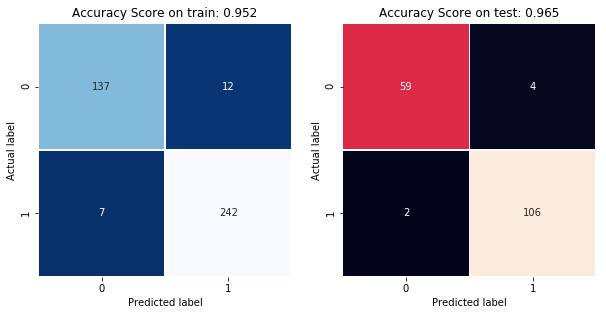

In [14]:
# visualization with seaborn
plt.figure(figsize=(10,5))
# on train set
plt.subplot(1,2,1)
sns.heatmap(cm_train, annot=True, fmt='.0f', linewidths=.5, square = True, cmap = 'Blues_r', cbar=False);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score on train: %.3f'%(train_acc)
plt.title(all_sample_title, size = 12);

# on test set
plt.subplot(1,2,2)
sns.heatmap(cm_test, annot=True, fmt='.0f', linewidths=.5, square = True, cbar=False);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score on test: %.3f' % test_acc
plt.title(all_sample_title, size = 12);

### 3.3 Precision, recall, F-measure and support
![](https://cdn-images-1.medium.com/max/1200/1*g5zpskPaxO8uSl0OWT4NTQ.png)

The **precision** is the ratio $\frac{tp}{tp + fp}$ where $tp$ is the number of true positives and $fp$ the number of false positives. *The precision is intuitively the ability of the classifier to* ***not label a sample as positive if it is negative***.

The **recall** is the ratio $\frac{tp}{tp + fn}$ where $tp$ is the number of true positives and $fn$ the number of false negatives. *The recall is intuitively the ability of the classifier to* ***find all the positive samples***.

The **F-beta score** can be interpreted as a **weighted harmonic mean of the precision and recall**, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score ($F_\beta$) weights the recall more than the precision by a factor of $\beta$, $\beta$ = 1.0 means recall and precision are equally important.

The **support** is the number of occurrences of each class in true label set.

In [15]:
print('='*60, '\nOn train set:\n')
print(classification_report(Ytrain, Ytrain_pred))
print('='*60, '\nOn test set:\n')
print(classification_report(Ytest, Ytest_pred))

On train set:

             precision    recall  f1-score   support

          0       0.95      0.92      0.94       149
          1       0.95      0.97      0.96       249

avg / total       0.95      0.95      0.95       398

On test set:

             precision    recall  f1-score   support

          0       0.97      0.94      0.95        63
          1       0.96      0.98      0.97       108

avg / total       0.96      0.96      0.96       171



### 3.4 ROC Curve
The [receiver operating characteristic (ROC) curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

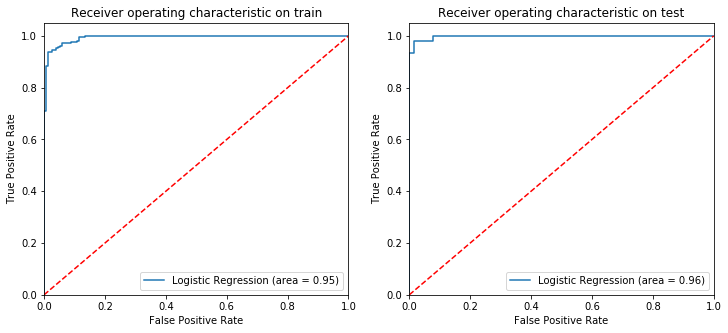

In [16]:
plt.figure(figsize=(12,5))
# train set 
plt.subplot(1,2,1)
logit_roc_auc = roc_auc_score(Ytrain, clf.predict(Xtrain))
fpr, tpr, thresholds = roc_curve(Ytrain, clf.predict_proba(Xtrain)[:,1])
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')  # = FP/(FP+TN)
plt.ylabel('True Positive Rate')   # = recall, sensitive = TP/(TP+FN)
plt.title('Receiver operating characteristic on train')
plt.legend(loc="lower right")

# test set
plt.subplot(1,2,2)
logit_roc_auc = roc_auc_score(Ytest, clf.predict(Xtest))
fpr, tpr, thresholds = roc_curve(Ytest, clf.predict_proba(Xtest)[:,1])
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic on test')
plt.legend(loc="lower right")

plt.show()

## cross validation


In [17]:
from sklearn.model_selection import cross_val_score
print(np.mean(cross_val_score(
    clf, 
    X=breast_cancer_df[breast_cancer.feature_names], 
    y=breast_cancer_df['class'], 
    cv=5
)))

0.9509041939207385


## 4. Conclusion
In breast cancer prediction, we can build a good classification model by logistic regression that can reach 96% accuracy on test set.